# Python 機器學習從零至一 

> 以 Scikit-Learn 做機器學習

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from xgboost import XGBClassifier

## 關於 Scikit-Learn

## 什麼是 Scikit-Learn?

> Scikit-learn 是開源的機器學習模組，透過它可以進行監督式以及非監督式學習，它提供了模型配適、資料預處理、模型選擇以及模型評估等功能。

來源：<https://scikit-learn.org>

## 以 `import` 指令載入 `sklearn`

In [2]:
import sklearn

## 如果環境中沒有安裝 Scikit-Learn，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'sklearn'
```

## 如果遭遇 ModuleNotFoundError 可以在終端機使用 `pip install` 指令安裝

```bash
pip install scikit-learn
```

## 可以透過兩個屬性檢查版本號與安裝路徑

- `__version__` 屬性檢查版本號。
- `__file__` 屬性檢查安裝路徑。

In [3]:
print(sklearn.__version__)
print(sklearn.__file__)

0.24.2
/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/sklearn/__init__.py


## 我們通常使用 Scikit-Learn 特定類別或函數，因此多數的時候我們以 `from sklearn import FUNCTIONALITY` 載入指定的功能，而非 `import sklearn`

## 為什麼選擇 Scikit-Learn？

Scikit-Learn 有著簡潔、一致且設計良善的應用程式介面設計，它的文件撰寫得相當完整而豐富，使用 Scikit-Learn 最大的好處在於它一致的應用程式介面，這讓使用者只要理解基礎用法和語法，就能延伸切換到其他的演算法或模型。

## Scikit-Learn 應用程式介面設計原則

- 一致性。
- 可檢查性。
- 不擴增新類別。
- 可組合性。
- 合理預設超參數。

## Scikit-Learn 起步走

## Scikit-Learn 的資料表達與機器學習一致

- 外型 $(m, n)$ 的特徵矩陣 $X$。
- 外型 $(m,)$ 或 $(m, 1)$ 的目標向量 $y$（或 $Y$）。

In [4]:
def plot_X_y():
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.axis('equal')
    # Draw features matrix
    ax.vlines(range(6), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=0, xmax=5, lw=1)
    font_prop = dict(size=12, family='monospace')
    ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
    ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
    ax.text(-0.1, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    # Draw labels vector
    ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=8, xmax=9, lw=1)
    ax.text(7, -1, "Target Vector ($y$)", size=14)
    ax.text(7.9, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    ax.set_ylim(10, -2)
    plt.show()

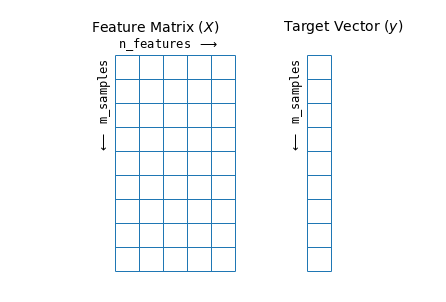

In [5]:
# 來源：<https://jakevdp.github.io/PythonDataScienceHandbook>
plot_X_y()

## 如何從資料框中取出特徵矩陣與目標向量

In [6]:
csv_url = "https://raw.githubusercontent.com/yaojenkuo/ml-newbies/master/player_stats.csv"
player_stats = pd.read_csv(csv_url)
print(type(player_stats))
print(player_stats.shape)

<class 'pandas.core.frame.DataFrame'>
(503, 50)


In [7]:
player_stats.head()

,firstName,lastName,temporaryDisplayName,personId,teamId,jersey,isActive,pos,heightFeet,heightInches,...,ftm,fta,pFouls,points,gamesPlayed,gamesStarted,plusMinus,min,dd2,td3
0,Precious,Achiuwa,"Achiuwa, Precious",1630173,1610612748,5.0,True,F,6,8,...,56.0,110.0,91.0,304.0,61.0,4.0,-116.0,737.0,3.0,0.0
1,Steven,Adams,"Adams, Steven",203500,1610612740,12.0,True,C,6,11,...,936.0,1708.0,1497.0,5629.0,588.0,524.0,1638.0,15812.0,125.0,1.0
2,Bam,Adebayo,"Adebayo, Bam",1628389,1610612748,13.0,True,C-F,6,9,...,842.0,1141.0,668.0,3549.0,287.0,183.0,258.0,7840.0,91.0,5.0
3,Ty-Shon,Alexander,"Alexander, Ty-Shon",1630234,1610612756,0.0,True,G,6,3,...,1.0,2.0,2.0,9.0,15.0,0.0,-8.0,47.0,0.0,0.0
4,Nickeil,Alexander-Walker,"Alexander-Walker, Nickeil",1629638,1610612740,6.0,True,G,6,6,...,73.0,103.0,145.0,775.0,93.0,14.0,-105.0,1597.0,0.0,0.0


In [8]:
X = player_stats[['apg', 'rpg']].values
y = player_stats['pos'].values
print(X.shape)
print(y.shape)

(503, 2)
(503,)


In [9]:
X = player_stats['heightMeters'].values.reshape(-1, 1)
y = player_stats['weightKilograms'].values
print(X.shape)
print(y.shape)

(503, 1)
(503,)


## Scikit-Learn 估計器

## 估計器（Estimators）是 Scikit-Learn 創造的重要類別

## 兩種估計器

1. 轉換器（Transformers）：用來預處理資料。
2. 預測器（Predictors）：用來訓練資料、生成規則 $w$。

## 複習：Scikit-Learn 應用程式介面設計原則

- 一致性。
- 可檢查性。
- 不擴增新類別。
- 可組合性。
- 合理預設超參數。

## 合理預設超參數原則

每個估計器類別都可以用預設超參數實例化為物件。

In [10]:
# Two transformers
poly = PolynomialFeatures()
ss = StandardScaler()

In [11]:
# Two predictors
lr = LinearRegression()
ridge = Ridge()

## 一致性原則

- 每個轉換器類別實例化的物件都有 `fit_transform()` 方法。
- 每個預測器類別實例化的物件都有 `fit()` 與 `predict()` 方法。

In [12]:
# Two transformers
X_poly = poly.fit_transform(X)
X_ss = ss.fit_transform(X)

In [13]:
# Two predictors
lr.fit(X, y)
ridge.fit(X, y)

Ridge()

## 可檢查性原則

每個估計器類別實例化的物件都有屬性或方法讓使用者檢視轉換與預測的規則。

In [14]:
# Two transformers
print(poly.get_params())
print(ss.mean_)
print(ss.scale_)

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}
[1.9887674]
[0.08491413]


In [15]:
# Two predictors
print(lr.intercept_)
print(lr.coef_)
print(ridge.alpha)

-103.98696452290916
[101.73033754]
1.0


## 不擴增新類別原則

預測器訓練完成之後，其 `intercept_` 屬性是 `np.float64`、 `coef_` 屬性則是 `ndarray`。

In [16]:
print(type(lr.intercept_))
print(type(lr.coef_))

<class 'numpy.float64'>
<class 'numpy.ndarray'>


## 可組合性原則

可以將 `ss` 轉換器與 `lr` 預測器組裝起來成為一個管線（Pipeline）類別。

In [17]:
pipeline = Pipeline([('scaler', ss), ('lr', lr)])
print(type(pipeline))

<class 'sklearn.pipeline.Pipeline'>


## 使用 Scikit-Learn 估計器的標準步驟

1. 準備特徵矩陣 $X$ 與目標向量 $y$。
2. 切割訓練與驗證資料集。
3. 初始化估計器。
4. 訓練、配適並檢查規則。
5. 在驗證資料集評估。

## 訓練、驗證與測試資料

## 什麼是訓練資料（Training data）

- 具有實際值或標籤的已實現歷史資料。
- 作用是讓機器學習演算法在尋找 $h$ 函數。
- 就像求學時課本中附有詳解的練習題一般，訓練我們對一個觀念的暸解。

## 什麼是驗證資料（Validation data）

- 同樣是具有實際值或標籤的已實現歷史資料，但是在使用上偽裝成不具有實際值或標籤的待預測資料。
- 作用是在把 $h$ 函數拿去面對未知資料之前，就能夠對其可能表現心底有數。
- 就像求學時參加模擬考試一般，過程中就像真的參加考試一般，但是之後馬上有解答可以參考。

## 什麼是測試資料（Test data）

- 是不具有實際值或標籤的待預測資料。
- 作為訓練完成的 $h$ 函數之輸入資料，達成資料預測目的。
- 就像求學時參加的大型考試一般。

## 以 [Kaggle](https://www.kaggle.com/) 網站的資料為例

- `train.csv` 分割為訓練與驗證資料。
- 待預測資料 `test.csv` 即為測試資料。
- 兩個資料的維度差別就是目標向量 $y$。

## [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

In [18]:
file_path = "data/titanic/{}"
train = pd.read_csv(file_path.format("train.csv"))
test = pd.read_csv(file_path.format("test.csv"))
train_columns = train.columns
test_columns = test.columns
train_columns.difference(test_columns)

Index(['Survived'], dtype='object')

## [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [19]:
file_path = "data/house-prices/{}"
train = pd.read_csv(file_path.format("train.csv"))
test = pd.read_csv(file_path.format("test.csv"))
train_columns = train.columns
test_columns = test.columns
train_columns.difference(test_columns)

Index(['SalePrice'], dtype='object')

## 使用 `train_test_split()` 函數可以分割為訓練與驗證資料

- 常見的訓練對驗證比例 `6:4` 到 `9:1` 不等。
- 原則是訓練資料筆數應該大過於驗證資料筆數，透過 `test_size` 參數來設定驗證資料的比例。

In [20]:
X = train[["GrLivArea"]].values
y = train["SalePrice"].values
X_train, X_valid = train_test_split(X, test_size=0.3)
print(X.shape)
print(X_train.shape)
print(X_valid.shape)

(1460, 1)
(1022, 1)
(438, 1)


In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1460, 1)
(1460,)
(1022, 1)
(438, 1)
(1022,)
(438,)


## 分割訓練與驗證資料的兩個步驟

1. 觀測值的隨機排序，像是玩撲克牌時的洗牌（Shuffle），避免 $h$ 函數的配適受到資料本來的排序樣態影響。
2. 依據 `test_size` 參數將資料水平分割。

In [22]:
def trainTestSplit(X_arr: np.array, y_arr: np.array, test_size: float, random_state: int=0) -> tuple:
    np.random.seed(random_state)
    np.random.shuffle(X_arr)
    np.random.seed(random_state)
    np.random.shuffle(y_arr)
    m = X_arr.shape[0]
    split_threshold = int(np.ceil(m * test_size))
    X_arr_valid, X_arr_train = np.split(X_arr, [split_threshold])
    y_arr_valid, y_arr_train = np.split(y_arr, [split_threshold])
    return X_arr_train, X_arr_valid, y_arr_train, y_arr_valid

In [23]:
X_train, X_valid, y_train, y_valid = trainTestSplit(X, y, test_size=0.3)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1460, 1)
(1460,)
(1022, 1)
(438, 1)
(1022,)
(438,)


## 使用估計器的標準步驟

## 複習：Scikit-Learn 估計器的標準步驟

1. 準備特徵矩陣 $X$ 與目標向量 $y$。
2. 切割訓練與驗證資料集。
3. 初始化估計器。
4. 訓練、配適並檢查規則。
5. 在驗證資料集評估。

## 不同的任務

- 預測數值。
- 預測類別。

## 預測數值：NBA 球員的體重

## 準備特徵矩陣 $X$ 與目標向量 $y$

In [24]:
csv_url = "https://raw.githubusercontent.com/yaojenkuo/ml-newbies/master/player_stats.csv"
player_stats = pd.read_csv(csv_url)
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = player_stats['weightKilograms'].values
print(X.shape)
print(y.shape)

(503, 3)
(503,)


## 切割訓練與驗證資料集

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(402, 3)
(101, 3)
(402,)
(101,)


## 初始化估計器

In [26]:
lr = LinearRegression()
ridge = Ridge()

## 訓練、配適並檢查規則

In [27]:
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
print(lr.coef_)
print(ridge.coef_)

[70.55073073 -1.03712458  1.61454939]
[41.71730648 -1.79495279  2.2969704 ]


## 在驗證資料集評估

In [28]:
y_pred = lr.predict(X_valid)
print(mean_squared_error(y_valid, y_pred))
y_pred = ridge.predict(X_valid)
print(mean_squared_error(y_valid, y_pred))

53.63580742285261
60.2499055659857


## 預測類別：NBA 球員的鋒衛位置

## 準備特徵矩陣 $X$ 與目標向量 $y$

In [29]:
pos_dict = {
    'G': 0,
    'F': 1,
    'C': 2
}
pos_recoded = player_stats['pos'].map(lambda x: x[0])
pos_recoded_int = pos_recoded.map(pos_dict)
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = pos_recoded_int.values
print(X.shape)
print(y.shape)

(503, 3)
(503,)


## 切割訓練與驗證資料集

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(402, 3)
(101, 3)
(402,)
(101,)


## 初始化估計器

In [31]:
logreg = LogisticRegression()
svc = SVC(kernel='linear', probability=True)

## 訓練、配適並檢查規則

In [32]:
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)
print(logreg.coef_)
print(svc.coef_)

[[-2.79855675  1.44081639 -1.11626655]
 [ 0.77311683 -0.181357    0.29423135]
 [ 2.02543992 -1.2594594   0.8220352 ]]
[[-3.56870681  1.17220423 -1.02617682]
 [-2.28        1.07865176 -0.67415719]
 [-2.06        0.55268973 -0.26909661]]


In [33]:
print(logreg.predict_proba(X_valid)[:5, :])
print(svc.predict_proba(X_valid)[:5, :])

[[3.28277259e-01 6.11285172e-01 6.04375685e-02]
 [1.58983789e-01 7.83373574e-01 5.76426368e-02]
 [9.63152975e-01 3.65027894e-02 3.44235186e-04]
 [1.11232339e-01 7.84153939e-01 1.04613722e-01]
 [1.79113159e-01 7.25169360e-01 9.57174807e-02]]
[[0.30799636 0.63708457 0.05491907]
 [0.14723912 0.81636574 0.03639514]
 [0.95875794 0.03698834 0.00425372]
 [0.09609978 0.82165481 0.08224541]
 [0.16543966 0.76708982 0.06747052]]


## 在驗證資料集評估

In [34]:
y_pred = logreg.predict(X_valid)
print(accuracy_score(y_valid, y_pred))
y_pred = svc.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.7524752475247525
0.7623762376237624


## 延伸到其他機器學習框架

## 什麼是機器學習框架

機器學習框架是讓開發者能更快、更簡單地建立與部署機器學習模型的應用程式介面，受歡迎的機器學習框架包括 Scikit-Learn、TensorFlow 與 PyTorch...等。

## 如果沒有機器學習框架

- 我們就必須自行定義評估器。
- 機器學習框架的存在，讓我們得以快速建立與部署機器學習模型。

## 自行定義評估器

- 花費比使用機器學習框架更多的時間、不一定能達到更好的效果。
- 聽起來像重複造輪，但實際上是能夠學習「機器學習」的好方法。
- 獲得比使用機器學習框架更大的客製化彈性。

## 機器學習框架分為兩類

1. 泛用的機器學習框架：Scikit-Learn、h2O、XGBoost、MLlib...等。
2. 專用的神經網路框架：TensorFlow, PyTorch...等。

## 我們可以將 Scikit-Learn 的所學延伸到其他機器學習框架

## 什麼是 XGBoost？

> XGBoost 是一個開源軟體，為 C++、Java、Python、R、和 Julia 提供了一個梯度提升機器學習演算法，由於這個演算法受到許多在機器學習競賽中獲獎團隊的青睞，因而受到了廣泛的歡迎和關注。

來源：<https://en.wikipedia.org/wiki/XGBoost>

## 以 XGBoost 預測數值：NBA 球員的體重

1. 準備特徵矩陣 $X$ 與目標向量 $y$。
2. 切割訓練與驗證資料集。
3. 初始化估計器。
4. 訓練、配適並檢查規則。
5. 在驗證資料集評估。

## 準備特徵矩陣 $X$ 與目標向量 $y$

In [35]:
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = player_stats['weightKilograms'].values

## 切割訓練與驗證資料集

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(402, 3)
(101, 3)
(402,)
(101,)


## 初始化估計器

In [37]:
xgb_r = XGBRegressor()

## 訓練、配適並檢查規則

In [38]:
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## 在驗證資料集評估

In [39]:
y_pred = xgb_r.predict(X_valid)
print(mean_squared_error(y_valid, y_pred))

71.92242945541291


## 以 XGBoost 預測類別：NBA 球員的鋒衛位置

1. 準備特徵矩陣 $X$ 與目標向量 $y$。
2. 切割訓練與驗證資料集。
3. 初始化估計器。
4. 訓練、配適並檢查規則。
5. 在驗證資料集評估。

## 準備特徵矩陣 $X$ 與目標向量 $y$

In [40]:
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = pos_recoded_int.values
print(X.shape)
print(y.shape)

(503, 3)
(503,)


## 切割訓練與驗證資料集

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(402, 3)
(101, 3)
(402,)
(101,)


## 初始化估計器

In [42]:
xgb_c = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

## 訓練、配適並檢查規則

In [43]:
xgb_c.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

## 在驗證資料集評估

In [44]:
y_pred = xgb_c.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.8811881188118812
